In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

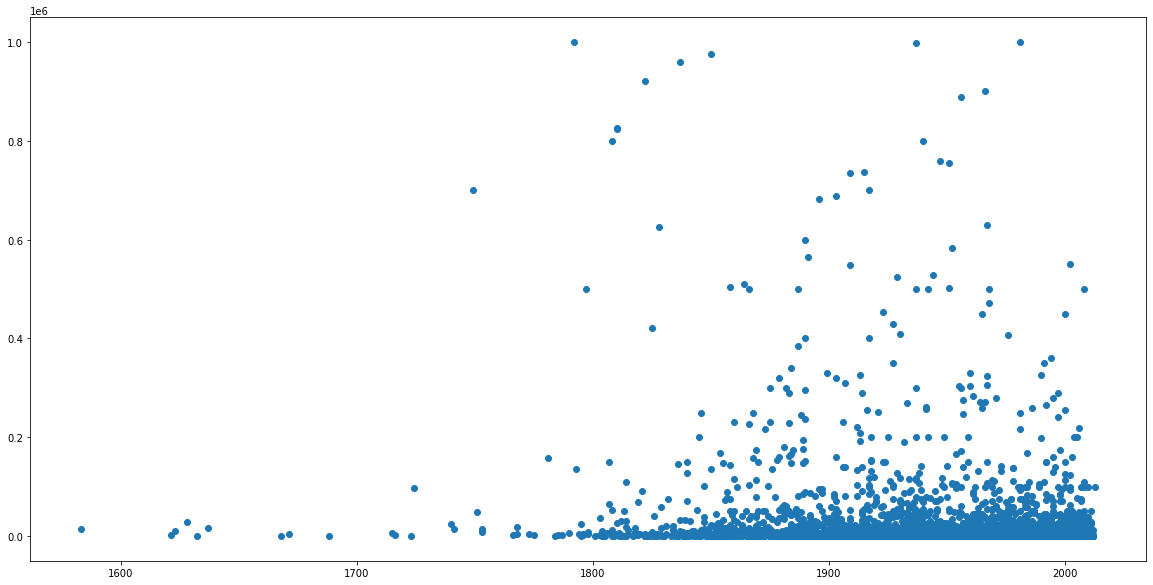

In [2]:
# size of found meteorites by year (excluding before 1500 and meteorites above 1T in mass)
c_meteorites = pd.read_csv("./data/cleansed-data.csv", delimiter=",")
c_meteorites.sort_values(by='Year',inplace=True)
# make filters
filter_large = c_meteorites['Mass'] <= 1000000
filter_year = c_meteorites['Year'] >= 1500
# apply filters
c_meteorites = c_meteorites[filter_large & filter_year]
# show figure
plt.figure(figsize=(20,10))
plt.scatter(c_meteorites['Year'], c_meteorites['Mass'],edgecolors='face')
plt.show() 

<BarContainer object of 118 artists>

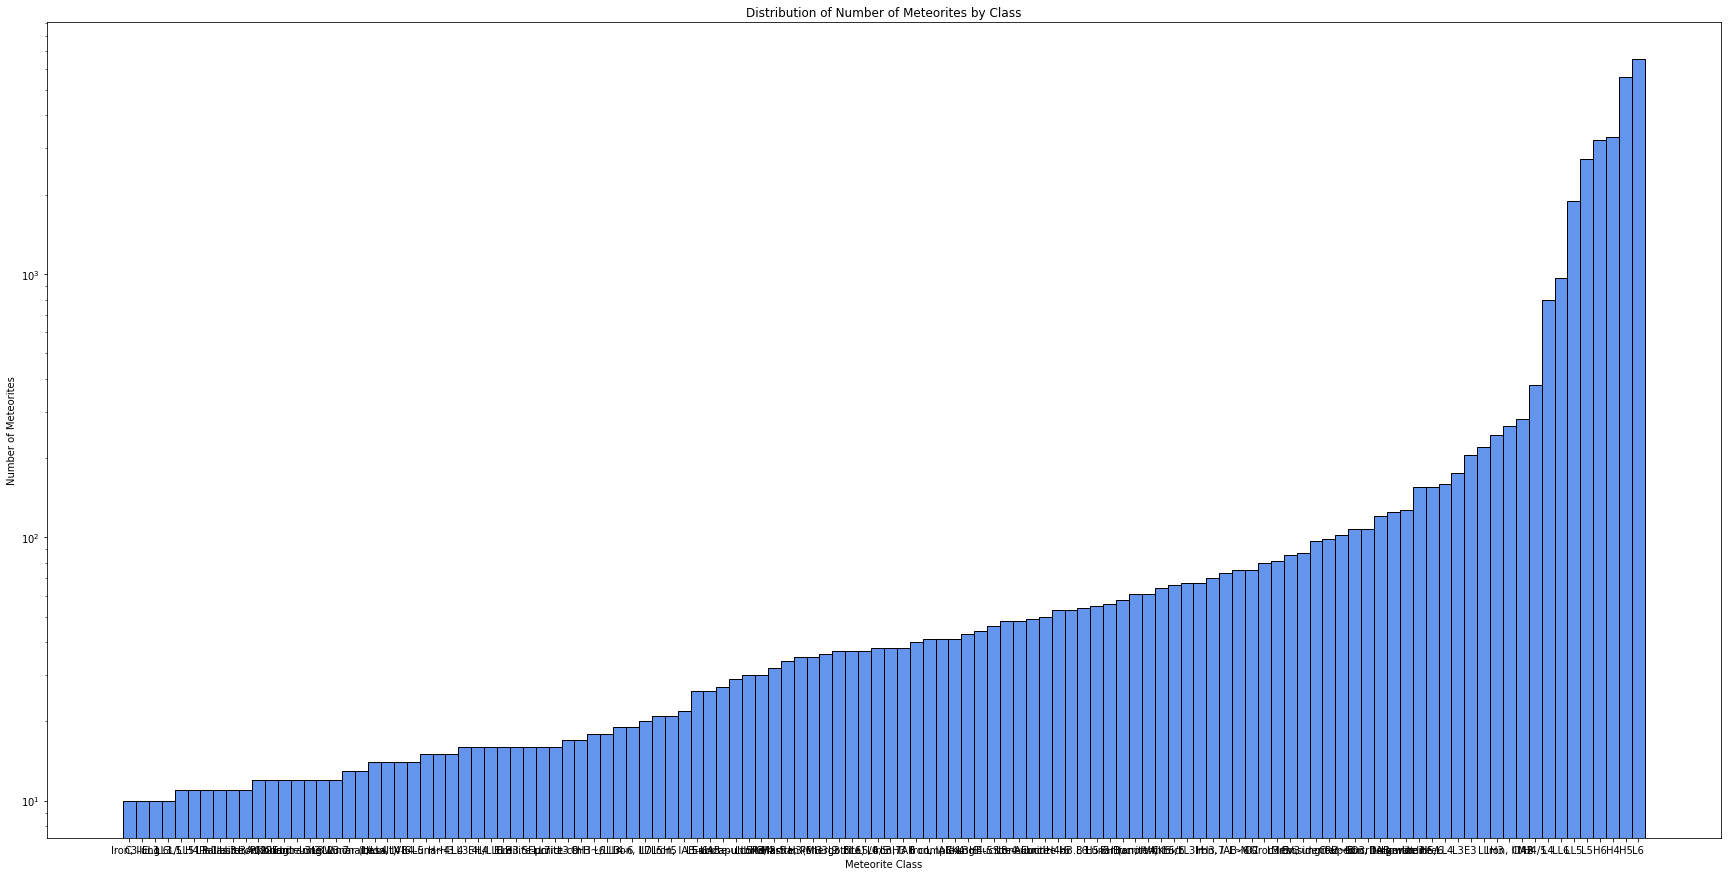

In [3]:
df_clean = pd.read_csv("./data/cleansed-data.csv", delimiter=",")
# generate classification series dataset
classes = df_clean["Class"].value_counts(ascending=True)
classes = classes[classes >= 10]
# set up plot headings and formatting
fig, ax = plt.subplots(figsize=(30,15))
ax.set_title('Distribution of Number of Meteorites by Class') # (51, 153, 255)
ax.set_ylabel('Number of Meteorites')
ax.set_xlabel('Meteorite Class')
# create plot
ax.bar(classes.index.values, classes,width=1,log=True,color='cornflowerblue',edgecolor=['black'])

In [4]:
fig = px.bar(classes,title="Distribution of Number of Meteorites by Class",
    labels={
        "index": "Meteorite Class",
        "value": "Number of Meteorites",
    },
    log_y=True,
    hover_name=None,
    hover_data=None
)
fig.update_layout(showlegend=False)
fig.show()

In [5]:
figure = px.scatter(x=c_meteorites['Year'], y=c_meteorites['Mass'],title="Meteorite Mass vs Year",
    labels={
        "x": "Year",
        "y": "Mass",
    },
    log_x=True
)
figure.update_layout(showlegend=False)
figure.show()

In [8]:
c_meteorites.drop(['Unnamed: 0','Name','ID','Class','Mass','Fell'], inplace=True,axis=1)
c_meteorites


,Year,Latitude,Longitude
172,1583.0,39.80000,16.20000
406,1621.0,31.00000,75.00000
946,1623.0,50.38333,-3.95000
366,1628.0,51.65000,-1.51667
619,1632.0,35.07833,136.93333
...,...,...,...
26530,2012.0,34.24216,-88.77594
5297,2012.0,-25.23333,-69.71667
20167,2012.0,22.94781,-13.38527
15887,2012.0,32.89100,9.91300


In [16]:
#x=c_meteorites['Longitude'], y=c_meteorites['Latitude'], z=c_meteorites['Year']
figure2 = px.scatter_3d(c_meteorites,x='Longitude',y='Latitude',z='Year',title="Meteor Locations vs Year",
    labels={
        "x": "X",
        "y": "Y",
        "z": "Z",
    }
)
figure2.update_layout(showlegend=False)
figure2.show()
# c_meteorites